**Import the packeges**


In [21]:
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Import the dataset**

In [22]:
tweet_df = pd.read_csv("//content/train.csv.zip", header=None, names=['Unnamed: 0', 'label', 'count', 'tweet'])

In [25]:
tweet_df.head()

Unnamed: 0          label  count  \
count hate_speech_count  offensive_language_count  neither_count  class   
3     0                                         0              3      2   
      0                                         3              0      1   
      0                                         3              0      1   
      0                                         2              1      1   

                                                                     tweet  
count hate_speech_count                                              tweet  
3     0                  !!! RT @mayasolovely: As a woman you shouldn't...  
      0                  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
      0                  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
      0                  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...

In [26]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 24784 entries, ('count', 'hate_speech_count') to ('3', '0')
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  24784 non-null  object
 1   label       24784 non-null  object
 2   count       24784 non-null  object
 3   tweet       24784 non-null  object
dtypes: object(4)
memory usage: 823.5+ KB


**Printing Random tweets**

In [27]:
print(tweet_df['tweet'].iloc[0],"\n")
print(tweet_df['tweet'].iloc[1],"\n")
print(tweet_df['tweet'].iloc[2],"\n")
print(tweet_df['tweet'].iloc[3],"\n")
print(tweet_df['tweet'].iloc[4],"\n")

tweet 

!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out... 

!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!! 

!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit 

!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny 



**Creating a function to process the data**

In [28]:
def data_processing(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r"https\S+|www\S+http\S+", '', tweet, flags = re.MULTILINE)
    tweet = re.sub(r'\@w+|\#','', tweet)
    tweet = re.sub(r'[^\w\s]','',tweet)
    tweet = re.sub(r'ð','',tweet)
    tweet_tokens = word_tokenize(tweet)
    filtered_tweets = [w for w in tweet_tokens if not w in stop_words]
    return " ".join(filtered_tweets)

In [29]:
tweet_df.tweet = tweet_df['tweet'].apply(data_processing)

In [30]:
tweet_df = tweet_df.drop_duplicates('tweet')

In [31]:
lemmatizer = WordNetLemmatizer()
def lemmatizing(data):
    tweet = [lemmatizer.lemmatize(word) for word in data.split()]
    return" ".join(tweet)

In [32]:
tweet_df['tweet'] = tweet_df['tweet'].apply(lambda x: lemmatizing(x))

Printing the data to see the effect of preprocessing

In [33]:
print(tweet_df['tweet'].iloc[0],"\n")
print(tweet_df['tweet'].iloc[1],"\n")
print(tweet_df['tweet'].iloc[2],"\n")
print(tweet_df['tweet'].iloc[3],"\n")
print(tweet_df['tweet'].iloc[4],"\n")

tweet 

rt mayasolovely woman shouldnt complain cleaning house amp man always take trash 

rt mleew17 boy dat coldtyga dwn bad cuffin dat hoe 1st place 

rt urkindofbrand dawg rt 80sbaby4life ever fuck bitch start cry confused shit 

rt c_g_anderson viva_based look like tranny 



In [34]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 24699 entries, ('count', 'hate_speech_count') to ('3', '0')
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  24699 non-null  object
 1   label       24699 non-null  object
 2   count       24699 non-null  object
 3   tweet       24699 non-null  object
dtypes: object(4)
memory usage: 820.7+ KB


In [35]:
tweet_df['label'].value_counts()

label
0                18811
3                 2788
1                 1693
2                 1199
6                  103
5                   54
4                   35
8                    5
9                    5
7                    5
neither_count        1
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

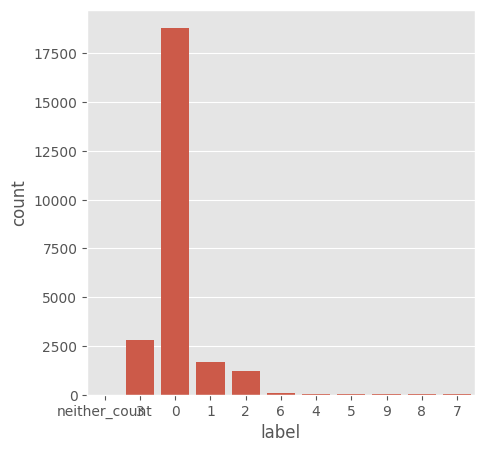

In [36]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='label', data = tweet_df)

Text(0.5, 1.0, 'Distribution of sentiments')

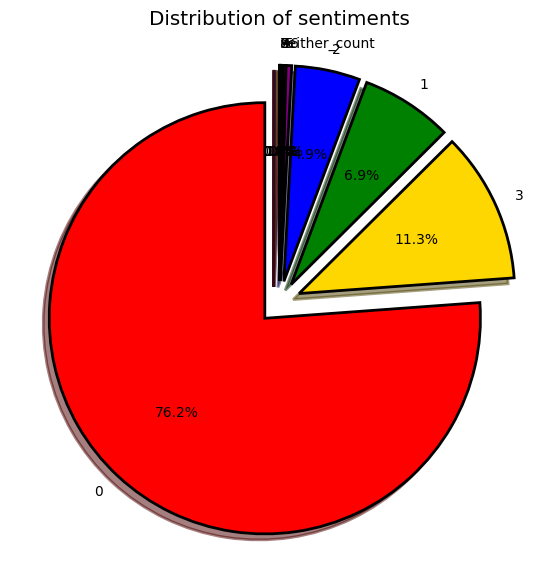

In [37]:
fig = plt.figure(figsize=(7,7))
colors = ("red", "gold", "green", "blue", "purple")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = tweet_df['label'].value_counts()
explode = (0.1,) * len(tags)
tags.plot(kind='pie',autopct = '%1.1f%%', shadow=True, colors = colors, startangle =90,
         wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [38]:
non_hate_tweets = tweet_df[tweet_df.label == 0]
non_hate_tweets.head()

Empty DataFrame
Columns: [Unnamed: 0, label, count, tweet]
Index: []

In [39]:
non_hate_tweets = tweet_df[tweet_df['label'] == 0]
if non_hate_tweets.empty:
    print("DataFrame non_hate_tweets is empty. Check filtering conditions.")
else:
    non_hate_tweets.head()
    text = ' '.join([word for word in non_hate_tweets['tweet']])
    plt.figure(figsize=(20,15), facecolor='None')
    wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Most frequent words in non hate tweets', fontsize = 19)
    plt.show()

DataFrame non_hate_tweets is empty. Check filtering conditions.


In [40]:
eg_tweets = tweet_df[tweet_df.label == 1]
eg_tweets.head()

Empty DataFrame
Columns: [Unnamed: 0, label, count, tweet]
Index: []

In [41]:
eg_tweets = tweet_df[tweet_df.label == 1]
if eg_tweets.empty:
    print("DataFrame eg_tweets is empty. Check filtering conditions.")
else:
    text = ' '.join([word for word in eg_tweets['tweet']])
    plt.figure(figsize=(20,15), facecolor='None')
    wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Most frequent words in hate tweets', fontsize = 19)
    plt.show()

DataFrame eg_tweets is empty. Check filtering conditions.


In [42]:
vect = TfidfVectorizer(ngram_range=(1,2)).fit(tweet_df['tweet'])

In [43]:
feature_names = vect.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features: \n{}".format(feature_names[:20]))

Number of features: 183274

First 20 features: 
['007' '007 httptcoon5t60rmfb' '007beardownjedi' '007beardownjedi afl'
 '007hertzrumble' '007hertzrumble httptcoqyn1bc7mxs' '007m_h'
 '007m_h lilduval' '00_jackie' '00_jackie darknight420' '00_jackie wan'
 '00sexilexi00' '00sexilexi00 bitch' '00sexilexi00 freeze'
 '00sexilexi00 httptcop3heuboqbu' '00sexilexi00 nigga'
 '00sexilexi00 socass_' '00sexilexi00 swiggety' '01' '01 going']


In [44]:
vect = TfidfVectorizer(ngram_range=(1,3)).fit(tweet_df['tweet'])

In [45]:
feature_names = vect.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features: \n{}".format(feature_names[:20]))

Number of features: 348107

First 20 features: 
['007' '007 httptcoon5t60rmfb' '007beardownjedi' '007beardownjedi afl'
 '007beardownjedi afl american' '007hertzrumble'
 '007hertzrumble httptcoqyn1bc7mxs' '007hertzrumble httptcoqyn1bc7mxs via'
 '007m_h' '007m_h lilduval' '007m_h lilduval damn' '00_jackie'
 '00_jackie darknight420' '00_jackie darknight420 allahthefairy'
 '00_jackie wan' '00_jackie wan na' '00sexilexi00' '00sexilexi00 bitch'
 '00sexilexi00 bitch as' '00sexilexi00 freeze']


In [46]:
X = tweet_df['tweet']
Y = tweet_df['label']
X = vect.transform(X)

In [47]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [48]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train: (19759, 348107)
Size of y_train: (19759,)
Size of x_test:  (4940, 348107)
Size of y_test:  (4940,)


In [49]:
print (x_train)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 470752 stored elements and shape (19759, 348107)>
  Coords	Values
  (0, 40846)	0.07485022690774357
  (0, 48840)	0.4024796830505984
  (0, 48842)	0.41877284840788936
  (0, 103858)	0.32062984347010215
  (0, 137787)	0.19912978614353552
  (0, 137842)	0.270040136528289
  (0, 137884)	0.41877284840788936
  (0, 306602)	0.3015254698743182
  (0, 306626)	0.41877284840788936
  (1, 40846)	0.05333449536791337
  (1, 47813)	0.27854951187726723
  (1, 47816)	0.29839640394340355
  (1, 186798)	0.14986591996919177
  (1, 232704)	0.1887708659809232
  (1, 232718)	0.2721602397249809
  (1, 232720)	0.29839640394340355
  (1, 271379)	0.21563635251589464
  (1, 271411)	0.29839640394340355
  (1, 299009)	0.20007100449670445
  (1, 299080)	0.27854951187726723
  (1, 299081)	0.29839640394340355
  (1, 340121)	0.29839640394340355
  (1, 340122)	0.29839640394340355
  (1, 340123)	0.29839640394340355
  (2, 22028)	0.07785342198019339
  :	:
  (19757, 144129)	0.200267983

In [50]:
print (y_train)

3  0    0
   0    0
   2    0
   0    0
   0    3
       ..
   0    0
   0    0
   1    0
   0    1
   0    3
Name: label, Length: 19759, dtype: object


In [51]:
print (x_test)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 117217 stored elements and shape (4940, 348107)>
  Coords	Values
  (0, 40846)	0.038234908295408244
  (0, 117265)	0.09663305479789408
  (0, 117807)	0.16469622170954448
  (0, 117814)	0.2139170730266159
  (0, 125535)	0.19968905618942806
  (0, 125538)	0.2139170730266159
  (0, 125539)	0.2139170730266159
  (0, 162740)	0.13695216770831742
  (0, 162813)	0.2139170730266159
  (0, 162814)	0.2139170730266159
  (0, 167494)	0.14664814119420597
  (0, 167532)	0.2139170730266159
  (0, 167533)	0.2139170730266159
  (0, 185963)	0.11012908619048613
  (0, 185991)	0.1276086538888996
  (0, 198158)	0.2139170730266159
  (0, 198159)	0.2139170730266159
  (0, 198160)	0.2139170730266159
  (0, 240278)	0.07126937124277688
  (0, 241273)	0.2139170730266159
  (0, 241274)	0.2139170730266159
  (0, 254034)	0.046048217587456246
  (0, 261893)	0.2139170730266159
  (0, 261894)	0.2139170730266159
  (0, 305142)	0.19968905618942806
  :	:
  (4938, 40846)	0.1178862206146

In [52]:
print (y_test)

3  0    0
   0    0
   0    1
   1    0
   0    0
       ..
   0    0
   0    0
   0    0
   1    0
   0    0
Name: label, Length: 4940, dtype: object


In [53]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_predict = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_predict, y_test)
print("Test accuarcy: {:.2f}%".format(logreg_acc*100))

Test accuarcy: 79.25%


In [59]:
logreg = LogisticRegression()
logreg.fit(x_test, y_test)
logreg_predict = logreg.predict(x_train)
logreg_acc = accuracy_score(logreg_predict, y_train)
print("Test accuarcy: {:.2f}%".format(logreg_acc*100))

Test accuarcy: 76.64%


In [65]:
print("y_test shape:", y_test.shape)
print("logreg_predict shape:", logreg_predict.shape)

y_test shape: (4940,)
logreg_predict shape: (19759,)


In [67]:
logreg_predict = logreg.predict(x_test)

In [68]:
y_test_dense = y_test.toarray().ravel() if hasattr(y_test, "toarray") else y_test.ravel()
logreg_predict_dense = logreg_predict.ravel()

In [71]:
y_test_dense = y_test.toarray() if hasattr(y_test, "toarray") else y_test
logreg_predict_dense = logreg_predict.toarray() if hasattr(logreg_predict, "toarray") else logreg_predict

print(confusion_matrix(y_test_dense, logreg_predict_dense))

[[3732    0    0    0    0    0    0    0    0]
 [ 353    2    0    0    0    0    0    0    0]
 [ 257    0    7    1    0    0    0    0    0]
 [ 360    0    0  187    0    0    0    0    0]
 [   8    0    0    0    0    0    0    0    0]
 [  10    0    0    0    0    0    0    0    0]
 [  21    0    0    0    0    0    0    0    0]
 [   1    0    0    0    0    0    0    0    0]
 [   1    0    0    0    0    0    0    0    0]]


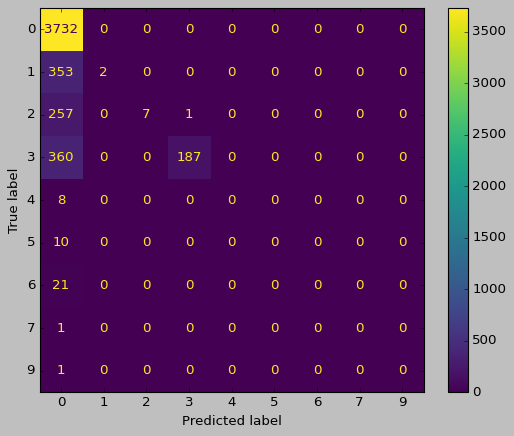

In [72]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_predict, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()